#### Import required libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#### Load train and test dataset

In [71]:
train_data=pd.read_csv('Dataset/train.csv')
test_data=pd.read_csv('Dataset/test.csv')

#### Print first 5 rows of train data

In [72]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Check shape of train and test data

In [73]:
train_data.shape

(614, 13)

In [74]:
test_data.shape

(367, 12)

#### Print dtypes and name of columns

In [75]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#### Check if train and test data has any missing or null values

In [76]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [77]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### Gender is a categorical column, lets see its value counts before handling missing values

In [78]:
train_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

#### As male category is more frequent , we will impute missing values with 'Male' i.e. mode of Gender.

In [79]:
train_data['Gender']=train_data['Gender'].fillna(train_data['Gender'].mode()[0])
test_data['Gender']=test_data['Gender'].fillna(train_data['Gender'].mode()[0])

#### Married is also a categorical column , lets see its value counts 

In [80]:
train_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

#### As Yes category is more frequent , we will impute missing values with 'Yes' i.e. mode of Married.

In [81]:
train_data['Married']=train_data['Married'].fillna(train_data['Married'].mode()[0])

#### Let's see value counts for Dependents

In [82]:
train_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

#### As '0' category is more frequent , we will impute missing values with '0' i.e. mode of Dependents.

In [83]:
train_data['Dependents']=train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
test_data['Dependents']=test_data['Dependents'].fillna(train_data['Dependents'].mode()[0])

#### Let's see value counts for Self_Employed

In [84]:
train_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

#### As No category is more frequent , we will impute missing values with 'NO' i.e. mode of Self_Employed.

In [85]:
train_data['Self_Employed']=train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])
test_data['Self_Employed']=test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])

#### LoanAmount is a numerical column, let's see its distribution  before imputing missing values

/usr/local/lib64/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <a list of 10 Patch objects>)

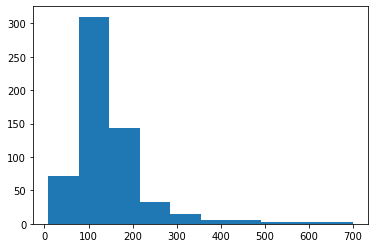

In [86]:
plt.hist(train_data['LoanAmount'])

#### As you can see , LoanAmount has skewed distribution we will impute missing values with median.

In [87]:
train_data['LoanAmount']=train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())
test_data['LoanAmount']=test_data['LoanAmount'].fillna(train_data['LoanAmount'].median())

#### Distribution for Loan_Amount_Term

(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 512.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <a list of 10 Patch objects>)

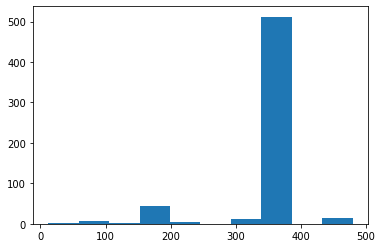

In [88]:
plt.hist(train_data['Loan_Amount_Term'])

#### Impute missing values with median

In [89]:
train_data['Loan_Amount_Term']=train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median())
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median())

#### Distribution for Credit_History

(array([ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 475.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

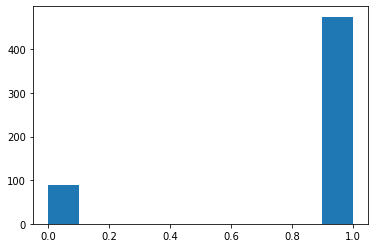

In [90]:
plt.hist(train_data['Credit_History'])

#### Impute missing values with mode

In [91]:
train_data['Credit_History']=train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])
test_data['Credit_History']=test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])

#### Check if there are any null values left after imputation

In [92]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [93]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Let's encode categorical variables now

#### Gender and Married columns each has two categories lets map them with 0 and 1

In [94]:
train_data['Gender']=train_data['Gender'].apply(lambda x : 0 if x=='Male' else 1)
test_data['Gender']=test_data['Gender'].apply(lambda x : 0 if x=='Male' else 1)

In [95]:
train_data['Married']=train_data['Married'].apply(lambda x : 0 if x=='Yes' else 1)
test_data['Married']=test_data['Married'].apply(lambda x : 0 if x=='Yes' else 1)



#### Dependents column has some order , we will use ordinal encoding for this.

In [96]:
ordinal_enc=OrdinalEncoder()

In [97]:
train_data['Dependents']=ordinal_enc.fit_transform(train_data[['Dependents']])

In [98]:
test_data['Dependents']=ordinal_enc.transform(test_data[['Dependents']])

In [99]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,0,0,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,0,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,0,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,1,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Let's see value counts for Education

In [100]:
train_data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

#### As Education and Self_Employed columns have only two categories , we will map them with 0 and 1

In [101]:
train_data['Education']=train_data['Education'].apply(lambda x : 0 if x=='Not Graduate' else 1)
test_data['Education']=test_data['Education'].apply(lambda x : 0 if x=='Not Graduate' else 1)

In [102]:
train_data['Self_Employed']=train_data['Self_Employed'].apply(lambda x : 0 if x=='No' else 1)
test_data['Self_Employed']=test_data['Self_Employed'].apply(lambda x : 0 if x=='No' else 1)

#### Print value counts for Property_Area

In [103]:
train_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

#### Let's map these three categories.

In [104]:
train_data['Property_Area']=train_data['Property_Area'].apply(lambda x : 0 if x=='Rural' else 1 if x=='Semiurban' else 2)
test_data['Property_Area']=test_data['Property_Area'].apply(lambda x : 0 if x=='Rural' else 1 if x=='Semiurban' else 2)

#### Now let's label target column

In [105]:
label_enc=LabelEncoder()

In [106]:
train_data['Loan_Status']=label_enc.fit_transform(train_data['Loan_Status'])

In [107]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0.0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,0,0,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,0,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,0,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,1,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [108]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,0,0.0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,0,0,1.0,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,0,0,2.0,1,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,0,0,2.0,1,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,0,1,0.0,0,0,3276,0,78.0,360.0,1.0,2


#### We don't need Loan_ID as it is unique for each applicant, so let's drop them from train and test data

In [109]:
train_data.drop(['Loan_ID'],axis=1,inplace=True)
test_data.drop(['Loan_ID'],axis=1,inplace=True)

In [110]:
target_labels=train_data['Loan_Status']
train_data.drop(['Loan_Status'],axis=1,inplace=True)

#### Let's make our first basic model using Logistic Regression

In [111]:
logistic_reg=LogisticRegression()

In [112]:
np.mean(cross_val_score(logistic_reg,train_data,target_labels,cv=5))

/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

0.8046800634584876

In [113]:
logistic_reg.fit(train_data,target_labels)

/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
def makeSubmission(estimator,test_data,filename,username):
    predictions=estimator.predict(test_data)
    predictions= list(map(lambda x: 'Y' if x==1 else 'N',predictions))
    Loan_ID=pd.read_csv('Dataset/test.csv')['Loan_ID']
    submissions=pd.DataFrame({'Loan_ID':Loan_ID,'Loan_Status':predictions})
    savedAs = 'submission'+'_'+filename+'_'+username
    submissions.to_csv(savedAs+'.csv',index=False)
    print("File saved as {}".format(savedAs))

In [115]:
makeSubmission(logistic_reg,test_data,'logitsic_regression','nitika') #0.777

File saved as submission_logitsic_regression_nitika


#### Now let's try xgboost model

In [116]:
import xgboost as xgb

In [117]:
xgb_classifier=xgb.XGBClassifier()

In [118]:
xgb_classifier.fit(train_data,target_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [119]:
np.mean(cross_val_score(xgb_classifier,train_data,target_labels,cv=5))

0.8030936012691697

In [120]:
makeSubmission(xgb_classifier,test_data,'Xgboost_','nitika') #0.777

File saved as submission_Xgboost__nitika


#### Feature Engineering

In [121]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0.0,1,0,5849,0.0,128.0,360.0,1.0,2
1,0,0,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,0,0.0,1,1,3000,0.0,66.0,360.0,1.0,2
3,0,0,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,0,1,0.0,1,0,6000,0.0,141.0,360.0,1.0,2


In [122]:
def dependent_category(married,gender):
    if gender==0 and married==0:
        return 'wife'
    elif gender==1 and married==0:
        return 'husband'
    else:
        return 'other'

In [123]:
dependent_cat=[]
for i in range(len(train_data)):
    category=dependent_category(train_data['Married'][i],train_data['Gender'][i])
    dependent_cat.append(category)

In [124]:
train_data['Dependent_Category']=dependent_cat

In [125]:
dependent_cat_test=[]
for i in range(len(test_data)):
    category=dependent_category(test_data['Married'][i],test_data['Gender'][i])
    dependent_cat_test.append(category)

In [126]:
test_data['Dependent_Category']=dependent_cat_test

In [127]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependent_Category
0,0,1,0.0,1,0,5849,0.0,128.0,360.0,1.0,2,other
1,0,0,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,wife
2,0,0,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,wife
3,0,0,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,wife
4,0,1,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,other


In [128]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependent_Category
0,0,0,0.0,1,0,5720,0,110.0,360.0,1.0,2,wife
1,0,0,1.0,1,0,3076,1500,126.0,360.0,1.0,2,wife
2,0,0,2.0,1,0,5000,1800,208.0,360.0,1.0,2,wife
3,0,0,2.0,1,0,2340,2546,100.0,360.0,1.0,2,wife
4,0,1,0.0,0,0,3276,0,78.0,360.0,1.0,2,other


In [129]:
train_data['Dependent_Category']=train_data['Dependent_Category'].apply(lambda x : 0 if x=='husband' else 1 if x=='wife' else 2)
test_data['Dependent_Category']=test_data['Dependent_Category'].apply(lambda x : 0 if x=='husband' else 1 if x=='wife' else 2)

In [130]:
train_data['Loan_Percent']=(train_data['LoanAmount']/(train_data['ApplicantIncome']+train_data['CoapplicantIncome']))*100

In [132]:
test_data['Loan_Percent']=(test_data['LoanAmount']/(test_data['ApplicantIncome']+test_data['CoapplicantIncome']))*100

In [133]:
xgb_classifier.fit(train_data,target_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [134]:
np.mean(cross_val_score(xgb_classifier,train_data,target_labels,cv=5))

0.8046271813855104

In [135]:
makeSubmission(xgb_classifier,test_data,'Xgboost_f1','nitika') #0.777

File saved as submission_Xgboost_f1_nitika
